## **<center>Predicting The Success of Crowdfunding Projects on Kickstarter** </center>


Authors: Cam Nguyen and Marium Waseem

GitHub Repository: https://github.com/camgitblame/INM701_IntroAI.git

Dataset Source: https://www.kaggle.com/code/milicaradisavljevic/kickstarter-projects-nn/input?select=ks-projects-201801.csv


## Import Libraries


In [1]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
import os

## Load Dataset


In [2]:
# Loading Kaggale Dataset
data = pd.read_csv("./ks-projects-201801.csv", encoding="latin1")
data.head(2)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00


## EDA


Data Inspection


In [3]:
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [4]:
data.shape

(378661, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df = data.drop(columns=["ID", "pledged", "usd pledged", "usd_pledged_real", "backers"])

In [7]:
df.head(2)

,name,category,main_category,currency,deadline,goal,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,failed,US,30000.00


#### Drop irrelevant columns


In [8]:
df[["goal", "usd_goal_real"]].head()

,goal,usd_goal_real
0,1000.0,1533.95
1,30000.0,30000.00
2,45000.0,45000.00
3,5000.0,5000.00
4,19500.0,19500.00


In [9]:
df = df.drop(columns=["goal"])

In [10]:
df.head(2)

,name,category,main_category,currency,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


In [11]:
df["country"].value_counts()

country
US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: count, dtype: int64

In [12]:
df["country"].describe()

count     378661
unique        23
top           US
freq      292627
Name: country, dtype: object

In [13]:
# Counting the occurrences of each currency type in the dataframe
df["currency"].value_counts() 

currency
USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: count, dtype: int64

In [14]:
df["currency"].describe()

count     378661
unique        14
top          USD
freq      295365
Name: currency, dtype: object

In [15]:
df = df.drop(columns=["currency"])

In [16]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


#### Handle missing values


In [17]:
df.shape

(378661, 8)

In [18]:
# Checking for missing values and removing any rows containing them
df.isnull().sum()

name             4
category         0
main_category    0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [19]:
df = df.dropna()

In [20]:
df.isnull().sum()

name             0
category         0
main_category    0
deadline         0
launched         0
state            0
country          0
usd_goal_real    0
dtype: int64

In [21]:
df.shape

(378657, 8)

#### Distribution of Projects By States


In [22]:
# Calculating the counts of each unique state and setting up a new dataframe with these counts

state_counts_og = df["state"].value_counts().reset_index()
state_counts_og.columns = ["state", "count"]
state_counts_og

,state,count
0,failed,197716
1,successful,133956
2,canceled,38779
3,undefined,3562
4,live,2799
5,suspended,1845


In [23]:
# Assigning colors for visualization: red for 'failed' and blue for 'successful' 

two_colors = {"failed": "#cf453c", "successful": "#6788ee"}

In [24]:
# Setting up a color palette for different project states to enhance visual differentiation

mul_colors = {
    "failed": "#cf453c",
    "successful": "#6788ee",
    "canceled": "#f7a889",
    "live": "#3b4cc0",
    "undefined": "#cdd9ec",
    "suspended": "#e46e56",
}

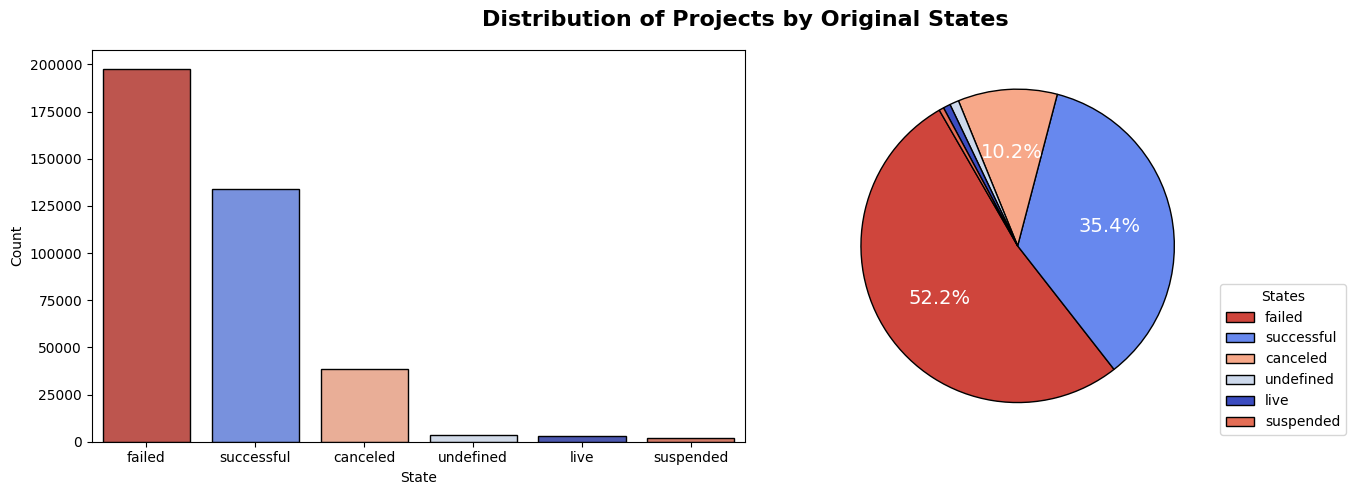

In [25]:
# Creating a side-by-side bar and pie chart to visualize the distribution of project states
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x='state', y='count', data=state_counts_og, palette=mul_colors, ax=axes[0], edgecolor='black', linewidth=1)
axes[0].set_xlabel('State')
axes[0].set_ylabel('Count')
axes[0].grid(False)

axes[1].pie(
    state_counts_og['count'],
    labels=state_counts_og['state'],
    colors=[mul_colors[state] for state in state_counts_og['state']],
    autopct=lambda pct: '%1.1f%%' % pct if pct >= 10 else '',
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 14, 'color': 'white'},
)


axes[1].legend(
    state_counts_og['state'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="States",
    fontsize=10
)

fig.suptitle('Distribution of Projects by Original States', fontsize=16, fontweight='bold', ha='center')

plt.tight_layout(rect=[0, 0, 0.95, 1]) 
plt.show()


##### Only keep `failed` and `successful` projects


In [26]:
# Filters the dataframe to only include rows where the 'state' is 'failed' or 'successful', then displays the first two rows

df = df.loc[df["state"].isin(["failed", "successful"])]
df.head(2)

,name,category,main_category,deadline,launched,state,country,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,30000.00


In [27]:
# Counts occurrences of each state and resets the index to create a new dataframe with 'state' and 'count' columns

stateCtNew = df["state"].value_counts().reset_index()
stateCtNew.columns = ["state", "count"]
stateCtNew

,state,count
0,failed,197716
1,successful,133956


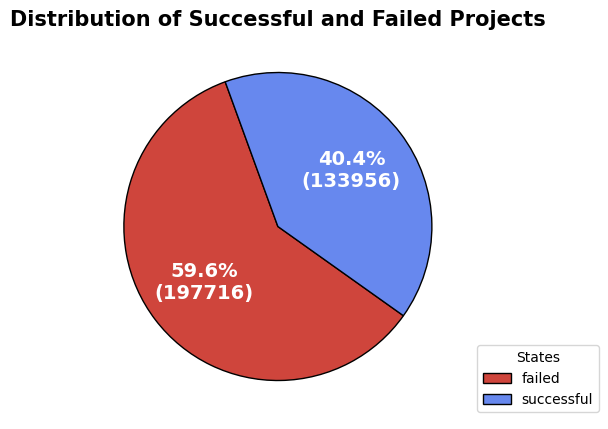

In [28]:
# shows a pie chart showing the distribution of successful and failed projects
fig, ax = plt.subplots(figsize=(5, 5))

def autopct_format(values):
    def custom_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({val:d})'
    return custom_format

wedges, texts, autotexts = ax.pie(
    stateCtNew['count'],
    labels=stateCtNew['state'],
    colors=[two_colors[state] for state in stateCtNew['state']],
    autopct=autopct_format(stateCtNew['count']),
    startangle=110,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 14, 'color': 'white'}
)

plt.setp(autotexts, size=14, weight='bold', color='white') 
plt.setp(texts, fontsize=14, color='white')  

ax.set_title('Distribution of Successful and Failed Projects', fontsize=15, fontweight='bold')

ax.legend(
    stateCtNew['state'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="States",
    fontsize=10
)

plt.show()


#### Distribution of Projects by Main Categories


In [29]:
df["main_category"].describe()

count           331672
unique              15
top       Film & Video
freq             56526
Name: main_category, dtype: object

In [30]:
# Counts occurrences of each main category, resets index, and sorts the counts in descending order
mainCatCount = df["main_category"].value_counts().reset_index()
mainCatCount.columns = ["main_category", "count"]
mainCatCount = mainCatCount.sort_values("count", ascending=False)

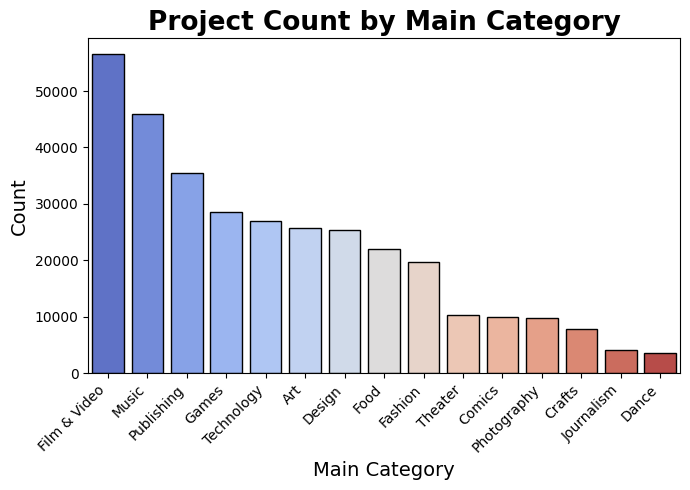

In [31]:
# Plots a countplot for project counts by main category
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x="main_category", order = mainCatCount['main_category'], palette="coolwarm", edgecolor="black", linewidth=1)
plt.title("Project Count by Main Category", fontsize=19, fontweight='bold')
plt.xlabel("Main Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

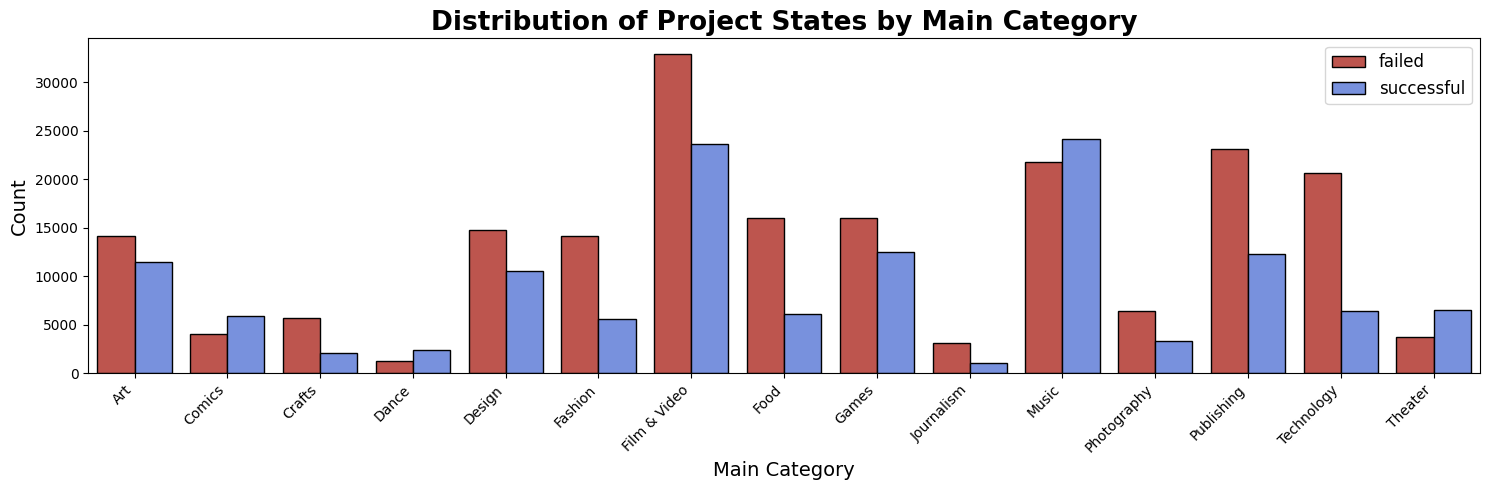

In [32]:
# Groups data by main category and state, then plots a bar chart to show the distribution of project states across categories

catStageCt = df.groupby(["main_category", "state"]).size().reset_index()
catStageCt.columns = ["main_category", "state", "count"]

plt.figure(figsize=(15, 5))
sns.barplot(data=catStageCt, x="main_category", y="count", hue="state", palette=two_colors, edgecolor="black", linewidth=1)

plt.title("Distribution of Project States by Main Category", fontsize=19, fontweight='bold')
plt.xlabel("Main Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='', fontsize=12)
plt.tight_layout()

plt.show()


#### Distribution of Projects by Categories


In [33]:
df["category"].describe()

count             331672
unique               159
top       Product Design
freq               18680
Name: category, dtype: object

In [34]:
# Filters successful and failed projects, identifies top 10 categories in each, and creates dataframes for count visualization

successfulProject = df.loc[df["state"] == "successful"]
successfulCat = successfulProject["category"].value_counts().head(10).index
successfulCat_df = successfulProject.loc[
    successfulProject["category"].isin(successfulCat)
]
successfulCatCt = successfulCat_df["category"].value_counts().reset_index()
successfulCatCt.columns = ["category", "count"]
failedProject = df.loc[df["state"] == "failed"]
failedCat = failedProject["category"].value_counts().head(10).index
failedCat_df = failedProject.loc[failedProject["category"].isin(failedCat)]
failedCatCt = failedCat_df["category"].value_counts().reset_index()
failedCatCt.columns = ["category", "count"]

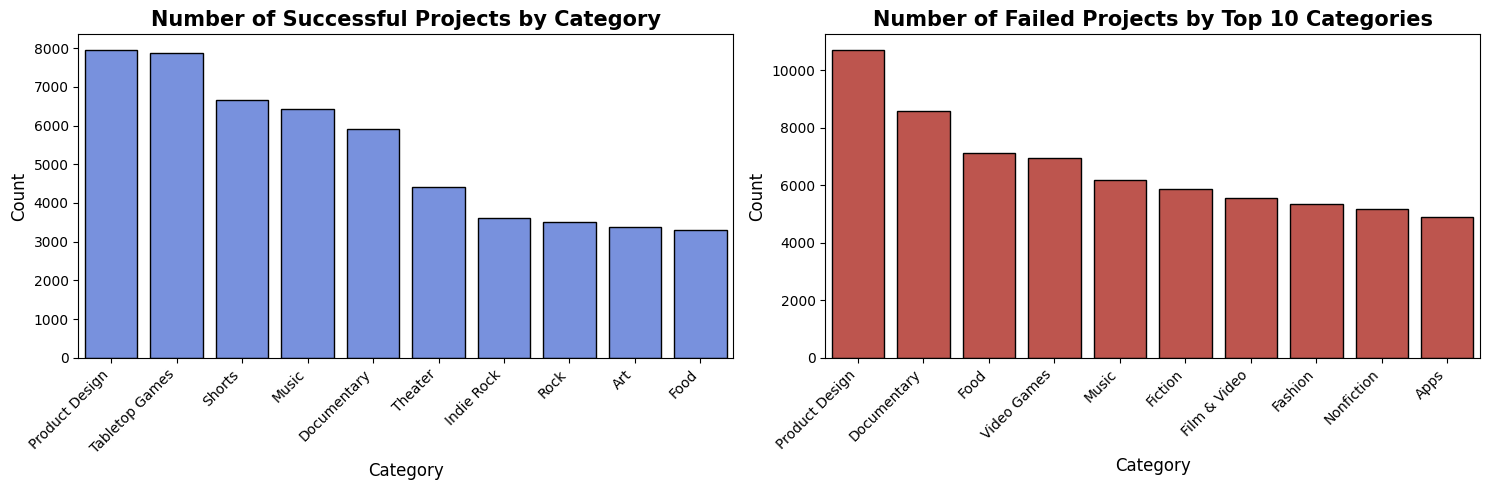

In [35]:
# Plots bar charts side-by-side for the top 10 categories
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=successfulCatCt, x="category", y="count", palette=["#6788ee"], edgecolor='black', linewidth=1)
plt.title("Number of Successful Projects by Category", fontsize=15, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sns.barplot(data=failedCatCt, x="category", y="count", palette=["#cf453c"], edgecolor='black', linewidth=1)
plt.title("Number of Failed Projects by Top 10 Categories", fontsize=15, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### Distribution of Projects by Goal


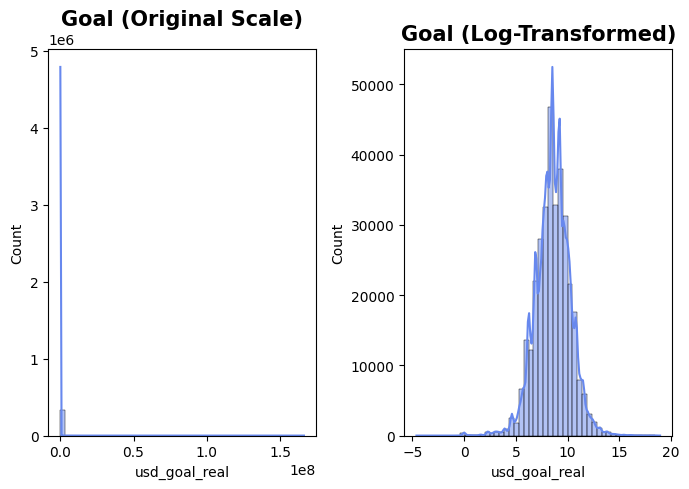

In [36]:
# usd_goal_real distribution before and after log transformation
plt.figure(figsize=(7, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["usd_goal_real"], bins=50, kde=True, color = "#6788ee")
plt.title("Goal (Original Scale)", fontsize=15, fontweight='bold')
plt.subplot(1, 2, 2)
sns.histplot(np.log(df["usd_goal_real"]), bins=50, kde=True, color = "#6788ee")
plt.title("Goal (Log-Transformed)", fontsize=15, fontweight='bold')
plt.tight_layout()

plt.show()

In [37]:
df["logGoal"] = np.log1p(df["usd_goal_real"])

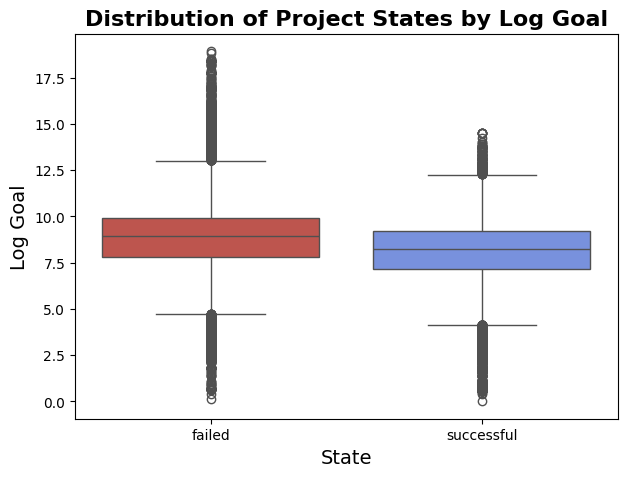

In [38]:
# Displays boxplots to compare the log-transformed goal amounts between different project states

plt.figure(figsize=(7, 5))
sns.boxplot(x="state", y="logGoal", data=df, palette=two_colors)
plt.title("Distribution of Project States by Log Goal", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Log Goal", fontsize=14)
plt.show()


In [39]:
df.drop(columns=["usd_goal_real"], inplace=True)

In [40]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,logGoal
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,7.336253
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,10.308986


#### Distribution of Projects by Time


Convert `launched` and `deadline` to date time format


In [41]:
df["launched"] = pd.to_datetime(df["launched"])
df["deadline"] = pd.to_datetime(df["deadline"])

Create `length` to calculate project lengths in days


In [42]:
df["length"] = (df["deadline"] - df["launched"]).dt.days + 1

In [43]:
df.head(2)

,name,category,main_category,deadline,launched,state,country,logGoal,length
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,7.336253,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,10.308986,60


In [44]:
lengthFailed = df[df["state"] == "failed"]["length"]
lengthFailed.describe()

count    197716.000000
mean         35.173350
std          13.175031
min           1.000000
25%          30.000000
50%          30.000000
75%          40.000000
max          92.000000
Name: length, dtype: float64

In [45]:
# Calculates the mean campaign length for failed and successful projects
meanLengthFailed = df[df["state"] == "failed"]["length"].mean()
meanLengthSuccessful = df[df["state"] == "successful"]["length"].mean()
print(meanLengthFailed)
print(meanLengthSuccessful)

35.17334965303769
32.15646928842306


In [46]:
meanLength = df.groupby("state")["length"].mean().reset_index()
meanLength.columns = ["state", "meanLength"]

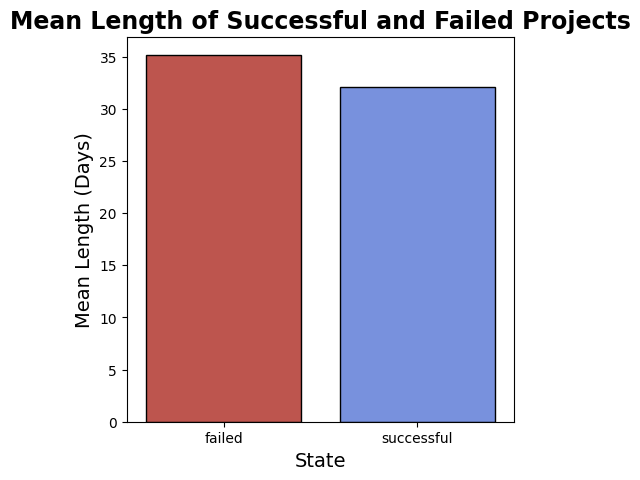

In [47]:
# Displays the average campaign lengths for successful and failed projects
plt.figure(figsize=(5, 5))
sns.barplot(data=meanLength, x="state", y="meanLength", palette=two_colors, edgecolor="black", linewidth=1)
plt.title("Mean Length of Successful and Failed Projects", fontsize=17, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Mean Length (Days)", fontsize=14)
plt.show()


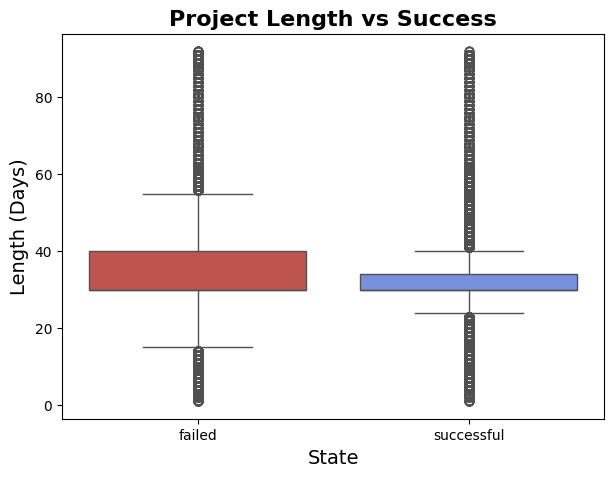

In [48]:
# Project length vs success
plt.figure(figsize=(7, 5))
sns.boxplot(x="state", y="length", data=df, palette=two_colors)

plt.title("Project Length vs Success", fontsize=16, fontweight='bold')
plt.xlabel("State", fontsize=14)
plt.ylabel("Length (Days)", fontsize=14)
plt.show()

- Create features `launch_year` and `launch_month`


In [49]:
df["launch_year"] = pd.to_datetime(df["launched"], format="mixed").dt.year
df["launch_month"] = pd.to_datetime(df["launched"], format="mixed").dt.month

In [50]:
# Converts project state to a numeric format and calculates average success rates by launch month and year

df["state_numeric"] = df["state"].apply(lambda x: 1 if x == "successful" else 0)
launch_month_success_rate = df.groupby("launch_month")["state_numeric"].mean()
df["launch_year"] = df["launch_year"].astype(str)
launch_year_success_rate = df.groupby("launch_year")["state_numeric"].mean()

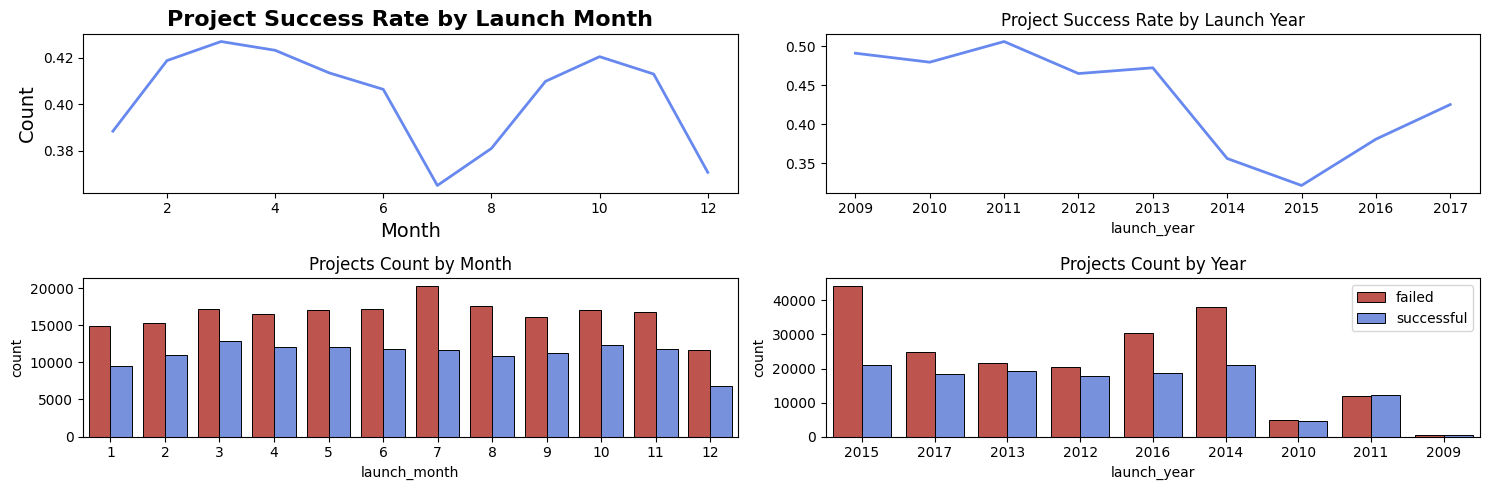

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(15, 5))

# Project Success Rate by Launch Month
sns.lineplot(x=launch_month_success_rate.index, y=launch_month_success_rate.values, ax=axes[0, 0], color='#6788ee', linewidth=2)
axes[0, 0].set_title("Project Success Rate by Launch Month", fontweight="bold", fontsize=16)
axes[0, 0].set_xlabel("Month", fontsize=14)
axes[0, 0].set_ylabel("Count", fontsize=14)

# Project Success Rate by Launch Year
sns.lineplot(x=launch_year_success_rate.index, y=launch_year_success_rate.values, ax=axes[0, 1], color='#6788ee', linewidth=2)
axes[0, 1].set_title("Project Success Rate by Launch Year")

# Projects count by month
sns.countplot(x="launch_month", hue="state", data=df, ax=axes[1, 0], palette=two_colors, edgecolor="black", linewidth=0.7)
axes[1, 0].set_title("Projects Count by Month")
axes[1, 0].get_legend().remove()

# Projects count by year
sns.countplot(x="launch_year", hue="state", data=df, ax=axes[1, 1], palette=two_colors, edgecolor="black", linewidth=0.7)
axes[1, 1].set_title("Projects Count by Year")
axes[1, 1].get_legend().set_title("")

plt.tight_layout()
plt.show()


In [52]:
df.drop(columns=["state_numeric", "launched", "deadline"], inplace=True)

In [53]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9


In [54]:
cw_colors = [
    "#e46e56",
    "#bbd1f8",
    "#f7af91",
    "#516ddb",
    "#f29274",
    "#f3c7b1",
    "#3b4cc0",
    "#86a9fc",
    "#a1c0ff",
    "#cf453c",
    "#6b8df0",
    "#b40426",
    "#d3dbe7",
    "#e6d7cf",
]

#### Distribution of Projects By Country


In [55]:
df["country"].describe()

count     331672
unique        23
top           US
freq      261358
Name: country, dtype: object

In [56]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N,0"',
       'JP'], dtype=object)

In [57]:
# replace 'N,0"' values in "country" with 'NO' to avoid discrepancies
df = df.replace({'country': 'N,0"'}, {'country': 'N0'}, regex=True)

In [58]:
df["country"].unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'SE',
       'FR', 'NZ', 'CH', 'AT', 'BE', 'DK', 'HK', 'NL', 'LU', 'SG', 'N0',
       'JP'], dtype=object)

In [59]:
countryCt = df["country"].value_counts().reset_index()
countryCt.columns = ["country", "count"]

In [60]:
# Calculates the normalized success and failure rates for projects by country, sorts by success rate, and handles missing values

countrySuccessRate = df.groupby("country")["state"].value_counts(normalize=True).unstack()
countrySuccessRate = countrySuccessRate.sort_values(by="successful", ascending=False)
countrySuccessRate = countrySuccessRate.fillna(0).reset_index()
countrySuccessRate.columns = ["country", "failed", "successful"]
countrySuccessRate["success_rate"] = countrySuccessRate["successful"] / (
        countrySuccessRate["failed"] + countrySuccessRate["successful"]
) * 100
countrySuccessRate = countrySuccessRate.sort_values(by="success_rate", ascending=False)

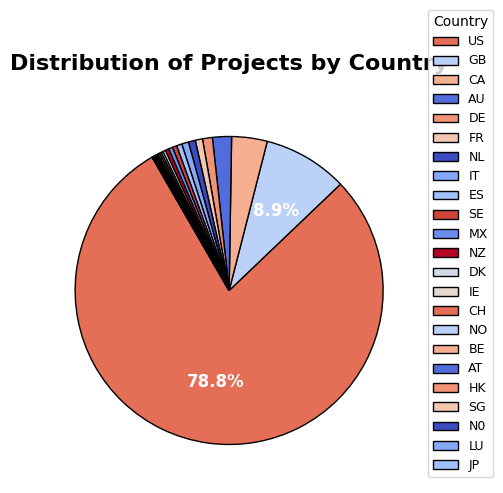

In [61]:
# Creates a pie chart to visualize the distribution of projects by country 
fig, ax = plt.subplots(figsize=(10, 5))

wedges, texts, autotexts = ax.pie(
    countryCt['count'],
    labels=countryCt['country'],
    colors=cw_colors[:len(countryCt)],
    autopct=lambda pct: '%1.1f%%' % pct if pct >= 8 else '',
    startangle=120,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 12, 'color': 'white'}
)

plt.setp(autotexts, size=12, weight='bold', color='white')
plt.setp(texts, fontsize=12, color='white')

plt.legend(
    countryCt['country'],
    loc='lower left',
    bbox_to_anchor=(1, 0),
    title="Country",
    fontsize=9
)
ax.set_title('Distribution of Projects by Country', fontsize=16, fontweight='bold', y=1.05)
plt.show()

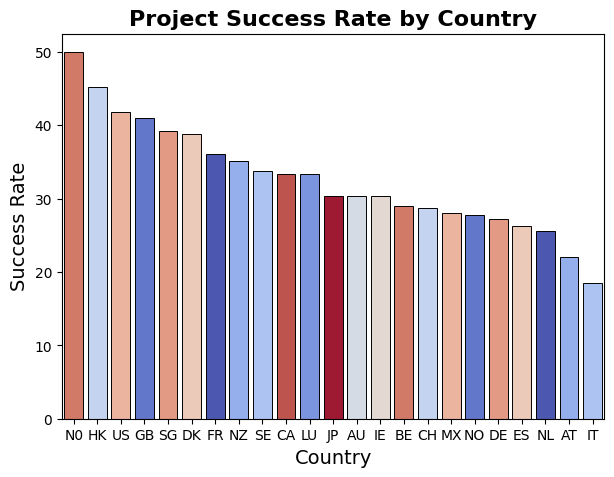

In [62]:
# Success rate by country 
plt.figure(figsize=(7, 5))
sns.barplot(x="country", y="success_rate", data=countrySuccessRate, palette=cw_colors, edgecolor="black", linewidth=0.7)
plt.title("Project Success Rate by Country", fontweight="bold", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Success Rate", fontsize=14)
# plt.xticks(rotation=90)
plt.show()

In [63]:
# create a feature to indicate projects based in the US
df['US_based'] = (df.country == 'US').astype(int)

In [64]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month,US_based
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8,0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9,1


#### Distribution of Projects Based on Name Features


In [65]:
# Create new features based on the name column
def name_features(df):
    # length
    df['n_length'] = df.name.str.len()

    # contain !
    df['exclaimation'] = (df.name.str[-1] == '!').astype(int)

    # contain ?
    df['question'] = (df.name.str[-1] == '?').astype(int)

    # word count
    df['words'] = df.name.apply(lambda x: len(str(x).split(' ')))

    # contain uppercase
    df['uppercase'] = df.name.str.isupper().astype(float)
    
    return df

In [66]:
df = name_features(df)

In [67]:
df.head(2)

,name,category,main_category,state,country,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,The Songs of Adelaide & Abullah,Poetry,Publishing,failed,GB,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,failed,US,10.308986,60,2017,9,1,45,0,0,8,0.0


In [68]:
df.drop(columns=["name", "country"], inplace=True)

In [69]:
df.head(2)

,category,main_category,state,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,Poetry,Publishing,failed,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Narrative Film,Film & Video,failed,10.308986,60,2017,9,1,45,0,0,8,0.0


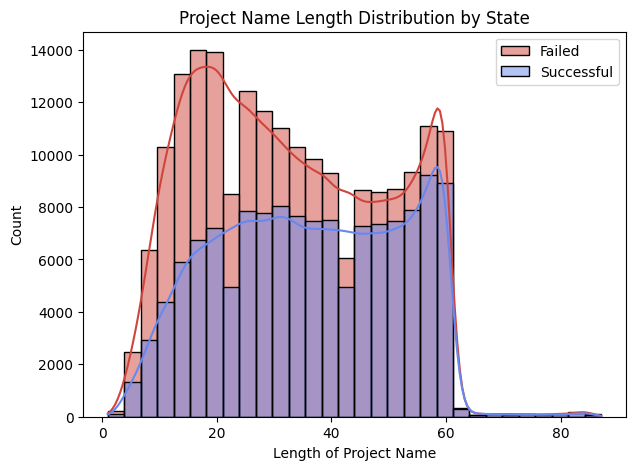

In [70]:
# Project Name Length Vs State
plt.figure(figsize=(7, 5))
sns.histplot(df.loc[df.state == 'failed', 'n_length'], bins=30, color='#cf453c', kde=True, label='Failed')
sns.histplot(df.loc[df.state == 'successful', 'n_length'], bins=30, color='#6788ee', kde=True, label='Successful')

plt.title('Project Name Length Distribution by State')
plt.xlabel('Length of Project Name')
plt.ylabel('Count')
plt.legend()
plt.show()

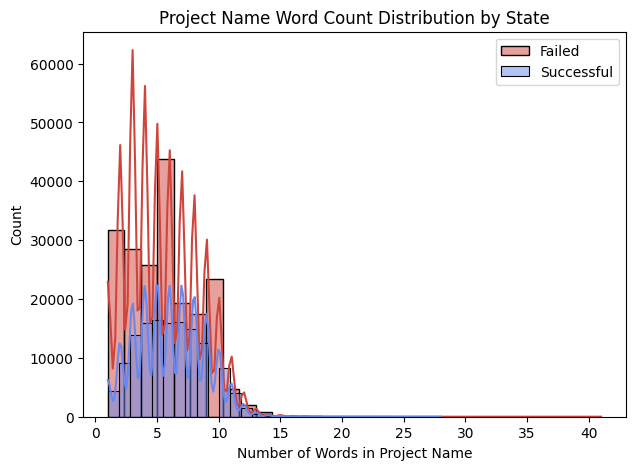

In [71]:
# Project name's word count vs State
plt.figure(figsize=(7, 5))
sns.histplot(df.loc[df.state == 'failed', 'words'], bins=30, color='#cf453c', kde=True, label='Failed')
sns.histplot(df.loc[df.state == 'successful', 'words'], bins=30, color='#6788ee', kde=True, label='Successful')

plt.title('Project Name Word Count Distribution by State')
plt.xlabel('Number of Words in Project Name')
plt.ylabel('Count')
plt.legend()
plt.show()

In [72]:
# Encode project states
df["state"] = df["state"].apply(lambda x: 1 if x == "successful" else 0)

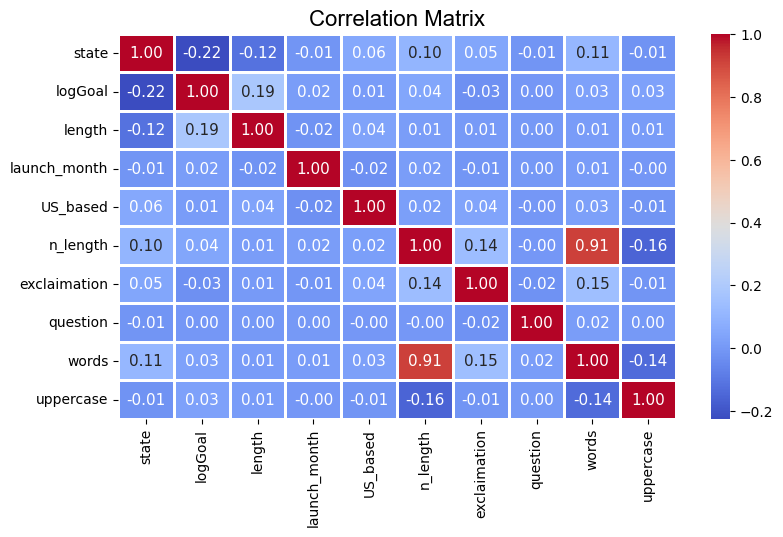

In [73]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(9, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    linewidths=1,
    annot_kws={"size": 11},
    fmt=".2f",
)
plt.title("Correlation Matrix", fontsize=16, fontname="Arial")
plt.show()

In [74]:
df.columns

Index(['category', 'main_category', 'state', 'logGoal', 'length',
       'launch_year', 'launch_month', 'US_based', 'n_length', 'exclaimation',
       'question', 'words', 'uppercase'],
      dtype='object')

In [75]:
# Cleaning category columns by replacing special characters and spaces to prepare for encoding
def clean_category_columns(val):
    if isinstance(val, str):
        val = val.replace('&', 'and')
        val = val.replace('-', '_')
        val = val.strip()
        val = val.replace(' ', '_')
    return val
    
df['category'] = df['category'].apply(clean_category_columns)
df['main_category'] = df['main_category'].apply(clean_category_columns)

In [76]:
df.head(2)

,category,main_category,state,logGoal,length,launch_year,launch_month,US_based,n_length,exclaimation,question,words,uppercase
0,Poetry,Publishing,0,7.336253,59,2015,8,0,31,0,0,6,0.0
1,Narrative_Film,Film_and_Video,0,10.308986,60,2017,9,1,45,0,0,8,0.0


## Preprocessing + Feature Engineering


In [77]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [78]:
def preprocessing(df):
    # Bin 'launch_month' into quarters
    df["launch_quarter"] = pd.cut(
        df["launch_month"], bins=[0, 3, 6, 9, 12], labels=["Q1", "Q2", "Q3", "Q4"]
    )
    df = pd.get_dummies(df, columns=["launch_quarter"], drop_first=True)
    df.drop(columns=["launch_month"], axis=1, inplace=True)

    # Encode 'launch_year"
    le = LabelEncoder()
    df["launch_year"] = le.fit_transform(df["launch_year"])

    # Encode categorical variables
    categorical_columns = ["main_category", "category"]
    df_encoded = pd.get_dummies(df[categorical_columns], drop_first=True)
    df_encoded.dropna(inplace=True)

    # Apply PCA on main_category and category columns
    pca = PCA(n_components=5, random_state=1)  
    df_pca = pca.fit_transform(df_encoded)
    df_pca = pd.DataFrame(df_pca, columns=[f"pca_{i}" for i in range(1, 6)], index=df_encoded.index)
    
    # Add PCA-transformed data to the DataFrame
    df = pd.concat([df, df_pca], axis=1)
    df.drop(columns=categorical_columns, axis=1, inplace=True)

    # Use MinMax Scaler to scale features 'logGoal' and 'length' 
    scaler = MinMaxScaler(feature_range=(0, 1))
    df[["scaled_logGoal", "scaled_length"]] = scaler.fit_transform(
        df[["logGoal", "length"]]
    )
    df.drop(columns=["logGoal", "length"], axis=1, inplace=True)

    return df

In [79]:
df = preprocessing(df)
df.head(2)

,state,launch_year,US_based,n_length,exclaimation,question,words,uppercase,launch_quarter_Q2,launch_quarter_Q3,launch_quarter_Q4,pca_1,pca_2,pca_3,pca_4,pca_5,scaled_logGoal,scaled_length
0,0,6,0,31,0,0,6,0.0,False,True,False,-0.182377,-0.371370,-0.605122,-0.446335,-0.234480,0.387231,0.637363
1,0,8,1,45,0,0,8,0.0,False,True,False,0.837878,0.168734,0.001497,-0.038863,-0.053499,0.544354,0.648352


## Training


### Import ML Libraries


In [80]:
# Importing necessary machine learning tools from scikit-learn for model training, evaluation, preprocessing, and ensemble methods

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Separating features (X) and the target variable (y) for model training
X = df.drop(columns=["state"], axis=1)
y = df[["state"]]

### Train Test Split


In [82]:
# splitting the data into training and testing sets with 20% of the data reserved for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(f"Train size: {X_train.shape}")
print(f"Test size: {X_test.shape}")

Train size: (265337, 17)
Test size: (66335, 17)


In [84]:
X_train.head()

,launch_year,US_based,n_length,exclaimation,question,words,uppercase,launch_quarter_Q2,launch_quarter_Q3,launch_quarter_Q4,pca_1,pca_2,pca_3,pca_4,pca_5,scaled_logGoal,scaled_length
308402,7,1,23,0,0,4,0.0,False,False,False,-0.208435,-0.443244,1.085505,-0.529999,-0.297277,0.449660,0.318681
74084,7,0,58,0,0,9,0.0,False,False,True,-0.134533,-0.182342,-0.004042,0.160682,0.781080,0.572236,0.263736
8279,6,0,60,0,0,10,0.0,False,True,False,-0.133475,-0.180503,-0.003993,0.158575,0.768959,0.575115,0.318681
26402,6,1,33,0,0,4,0.0,False,False,False,-0.208435,-0.443244,1.085505,-0.529999,-0.297277,0.413034,0.538462
305815,2,1,37,0,0,7,0.0,True,False,False,1.016025,0.217481,0.002053,-0.054744,-0.081315,0.571353,0.318681


In [85]:
y_train.head()

,state
308402,0
74084,0
8279,0
26402,1
305815,0


### Baseline Model with Dummy Classifier


In [86]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    roc_auc_score,
    precision_score,
    recall_score,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix


In [87]:
# Training and evaluating a Dummy Classifier as a baseline model to determine basic prediction accuracy and other metrics

dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train, y_train)
accuracy = dummy.score(X_test, y_test)
y_pred = dummy.predict(X_test)

print("Baseline Model using Dummy Classifier Results:")
dummyAcc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {dummyAcc:.4f}")
dummyF1 = f1_score(y_test, y_pred, average="weighted")
print(f"\nF1 Score (weighted): {dummyF1:.4f}")
dummyPre = precision_score(y_test, y_pred, average="weighted")
print(f"\nPrecision Score (weighted): {dummyPre:.4f}")
dummyRec = recall_score(y_test, y_pred, average="weighted")
print(f"\nRecall Score (weighted): {dummyRec:.4f}")
dummyAUC = roc_auc_score(y_test, y_pred)
print(f"\nAUC ROC: {dummyAUC:.4f}")
dummyReport = classification_report(y_test, y_pred)
print("\nClassification Report:\n", dummyReport)
dummyCm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", dummyCm)

Baseline Model using Dummy Classifier Results:
Accuracy: 0.5966

F1 Score (weighted): 0.4459

Precision Score (weighted): 0.3559

Recall Score (weighted): 0.5966

AUC ROC: 0.5000

Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75     39576
           1       0.00      0.00      0.00     26759

    accuracy                           0.60     66335
   macro avg       0.30      0.50      0.37     66335
weighted avg       0.36      0.60      0.45     66335


Confusion Matrix:
 [[39576     0]
 [26759     0]]


<Figure size 800x550 with 0 Axes>

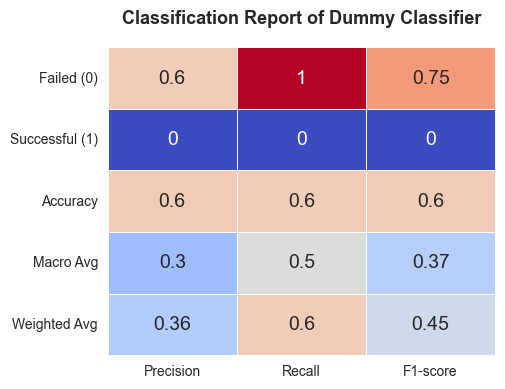

[Text(0, 0.5, 'Failed'), Text(0, 1.5, 'Successful')]

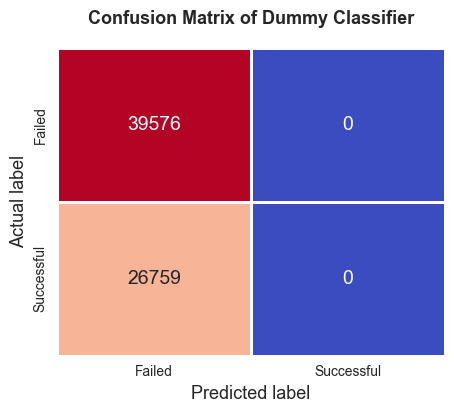

In [88]:
dummyReport = classification_report(y_test, y_pred, output_dict=True)
dummyCm = confusion_matrix(y_test, y_pred)

# Classification Report
plt.figure()
fig, ax = plt.subplots(figsize=(5, 4))
xticks = ["Precision", "Recall", "F1-score"]
sns.heatmap(
    pd.DataFrame(dummyReport).iloc[:-1, :].T,
    annot=True,
    annot_kws={"size": 14},
    cbar=False,
    cmap="coolwarm",
    linewidths=0.7,
    linecolor="white",
    xticklabels=xticks,
)
plt.title(
        f"Classification Report of Dummy Classifier",
    y=1.05,
    fontsize=13,
    weight="bold",
    loc="center",
    wrap=True,
)
ax.set_yticklabels(["Failed (0)", "Successful (1)", "Accuracy", "Macro Avg", "Weighted Avg"])
plt.show()

# Confusion Matrix
classes = ["Failed", "Successful"]
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(
    pd.DataFrame(dummyCm),
    annot=True,
    annot_kws={"size": 14},
    fmt="g",
    cmap="coolwarm",
    linewidths=1,
    linecolor="white",
    cbar=False,
)
plt.title(
    f"Confusion Matrix of Dummy Classifier",
    y=1.05,
    fontsize=13,
    weight="bold",
    loc="center",
    wrap=True,
)
plt.ylabel("Actual label", fontsize=13)
plt.xlabel("Predicted label", fontsize=13)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)


In [93]:
# pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Note: you may need to restart the kernel to use updated packages.


In [94]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# pip install imblearn
from imblearn.over_sampling import SMOTE

### Training Pipeline


In [99]:
# Defines a function for training and calculating key metrics like accuracy, F1 score, precision, recall, and ROC AUC score
def training(model_name, model_pipeline, X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    model_pipeline.fit(X_train, y_train)

    y_pred = model_pipeline.predict(X_test)
    y_proba = model_pipeline.predict_proba(X_test)[:, 1]

    clf_report = classification_report(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    conf_matrix = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    prec = precision_score(y_test, y_pred, average="weighted")
    rec = recall_score(y_test, y_pred, average="weighted")

    print(f"Accuracy (weighted) for {model_name}: {acc:.4f}")
    print(f"\nF1 (weighted) for {model_name}: {f1:.4f}")
    print(f"\nPrecision (weighted) for {model_name}: {prec:.4f}")
    print(f"\nRecall (weighted) for {model_name}: {rec:.4f}")
    print(f"\nROC AUC Score for {model_name}: {roc_auc:.4f}")
    print(f"\nClassification Report for {model_name}:\n", clf_report)
    print(f"\nConfusion Matrix for {model_name}:\n", conf_matrix)

    return {
        "model_name": model_name,
        "accuracy": acc,
        "f1": f1,
        "precision": prec,
        "recall": rec,
        "roc_auc": roc_auc,
        "clf_report": clf_report,
        "conf_matrix": conf_matrix,
    }

#### Gaussian NB


This model assumes that features follow a normal distribution


In [128]:
# Configures a pipeline with SMOTE, StandardScaler, and GaussianNB, then trains and evaluates it using the training function

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

gaussianClf = Pipeline(
    steps=[
        ('smote', SMOTE(random_state=42)), 
        ("scaler", StandardScaler()),     
        ("Gaussian NB", GaussianNB()),      
    ]
)

gaussianRes = training("Gaussian NB", gaussianClf, X, y)

Accuracy (weighted) for Gaussian NB: 0.5829

F1 (weighted) for Gaussian NB: 0.5796

Precision (weighted) for Gaussian NB: 0.6401

Recall (weighted) for Gaussian NB: 0.5829

ROC AUC Score for Gaussian NB: 0.6563

Classification Report for Gaussian NB:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57     39544
           1       0.49      0.76      0.60     26791

    accuracy                           0.58     66335
   macro avg       0.62      0.61      0.58     66335
weighted avg       0.64      0.58      0.58     66335


Confusion Matrix for Gaussian NB:
 [[18193 21351]
 [ 6320 20471]]


#### Bernoulli NB


In [106]:
berClf = Pipeline(
    steps= [
        ('smote', SMOTE(random_state=42)), 
        ("Scaler", StandardScaler()),
        ("Bernoulli Naive Bayes", BernoulliNB())]
)

berRes = training("Bernoulli Naive Bayes", berClf, X, y)

Accuracy (weighted) for Bernoulli Naive Bayes: 0.5979

F1 (weighted) for Bernoulli Naive Bayes: 0.6009

Precision (weighted) for Bernoulli Naive Bayes: 0.6073

Recall (weighted) for Bernoulli Naive Bayes: 0.5979

ROC AUC Score for Bernoulli Naive Bayes: 0.6332

Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65     39544
           1       0.50      0.57      0.53     26791

    accuracy                           0.60     66335
   macro avg       0.59      0.59      0.59     66335
weighted avg       0.61      0.60      0.60     66335


Confusion Matrix for Bernoulli Naive Bayes:
 [[24430 15114]
 [11561 15230]]


#### Logistic Regression


Uses a method that’s good for predicting categories (like yes/no outcomes). It focuses on the most important data features using L1 regularization.


In [ ]:
logClf = Pipeline(
    steps= [
        ('smote', SMOTE(random_state=42)), 
        ("Scaler", StandardScaler()),
        ("Logistic Regression", LogisticRegression(penalty="l1", solver="saga")),
    ]
)

logRes = training("Logistic Regression", logClf, X, y)

Accuracy (weighted) for Logistic Regression: 0.6281

F1 (weighted) for Logistic Regression: 0.6315

Precision (weighted) for Logistic Regression: 0.6430

Recall (weighted) for Logistic Regression: 0.6281

ROC AUC Score for Logistic Regression: 0.6799

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67     39544
           1       0.53      0.64      0.58     26791

    accuracy                           0.63     66335
   macro avg       0.63      0.63      0.62     66335
weighted avg       0.64      0.63      0.63     66335


Confusion Matrix for Logistic Regression:
 [[24535 15009]
 [ 9661 17130]]


#### KNN


Uses a method that classifies data based on the closest neighbors. In this case, it looks at the 4 nearest points to decide the category of each example.


In [ ]:
knnClf = Pipeline(
    steps= [
        ('smote', SMOTE(random_state=42)), 
        ("Scaler", StandardScaler()),
        ("knn",
            KNeighborsClassifier(n_neighbors=4, p=2, metric="minkowski", n_jobs=-1),
        ),
    ]
)

knnRes = training("KNN", knnClf, X, y)

Accuracy (weighted) for KNN: 0.6242

F1 (weighted) for KNN: 0.6153

Precision (weighted) for KNN: 0.6146

Recall (weighted) for KNN: 0.6242

ROC AUC Score for KNN: 0.6433

Classification Report for KNN:
               precision    recall  f1-score   support

           0       0.66      0.75      0.70     39544
           1       0.54      0.44      0.48     26791

    accuracy                           0.62     66335
   macro avg       0.60      0.59      0.59     66335
weighted avg       0.61      0.62      0.62     66335


Confusion Matrix for KNN:
 [[29750  9794]
 [15135 11656]]


#### Random Forest


Uses a method that combines multiple decision trees to make accurate predictions.


In [ ]:
rfClf = Pipeline(
steps= [
        ('smote', SMOTE(random_state=42)), 
        ("Scaler", StandardScaler()),
        (
            "rf",
            RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_leaf=3),
        ),
    ]
)

rfRes = training("Random Forest Classifier", rfClf, X, y)

Accuracy (weighted) for Random Forest Classifier: 0.6348

F1 (weighted) for Random Forest Classifier: 0.6382

Precision (weighted) for Random Forest Classifier: 0.6530

Recall (weighted) for Random Forest Classifier: 0.6348

ROC AUC Score for Random Forest Classifier: 0.6995

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.73      0.61      0.67     39544
           1       0.54      0.67      0.60     26791

    accuracy                           0.63     66335
   macro avg       0.63      0.64      0.63     66335
weighted avg       0.65      0.63      0.64     66335


Confusion Matrix for Random Forest Classifier:
 [[24274 15270]
 [ 8957 17834]]


### Compare Model Performance


In [110]:
model_name = [
    "Dummy Classifier",
    "Gaussian NB",
    "Bernoulli NB",
    "Logistic Regression",
    "KNN",
    "Random Forest",
]

compareModels = pd.DataFrame(
    {
        "Model": model_name,
        "Accuracy": [
            dummyAcc,
            gaussianRes["accuracy"],
            berRes["accuracy"],
            logRes["accuracy"],
            knnRes["accuracy"],
            rfRes["accuracy"],
        ],
        "Precision": [
            dummyPre,
            gaussianRes["precision"],
            berRes["precision"],
            logRes["precision"],
            knnRes["precision"],
            rfRes["precision"],
        ],
        "Recall": [
            dummyRec,
            gaussianRes["recall"],
            berRes["recall"],
            logRes["recall"],
            knnRes["recall"],
            rfRes["recall"],
        ],
        "F1": [
            dummyF1, 
            gaussianRes["f1"], 
            berRes["f1"],
            logRes["f1"],
            knnRes["f1"], 
            rfRes["f1"]
        ],
        "ROC AUC": [
            dummyAUC,
            gaussianRes["roc_auc"],
            berRes["roc_auc"],
            logRes["roc_auc"],
            knnRes["roc_auc"],
            rfRes["roc_auc"],
        ],
    }
)

compareModels

,Model,Accuracy,Precision,Recall,F1,ROC AUC
0,Dummy Classifier,0.596608,0.355941,0.596608,0.445872,0.500000
1,Gaussian NB,0.582860,0.640119,0.582860,0.579610,0.656255
2,Bernoulli NB,0.597874,0.607348,0.597874,0.600920,0.633164
3,Logistic Regression,0.628100,0.642973,0.628100,0.631489,0.679947
4,KNN,0.624195,0.614582,0.624195,0.615279,0.643279
5,Random Forest,0.634778,0.653025,0.634778,0.638185,0.699470


In [113]:
# pip install dataframe-image
import dataframe_image as dfi

In [118]:
# dfi.export(compareModels, "compareModels.png", fontsize= 18, dpi=400)

## Model Tuning


In [119]:
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [120]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### GridSearch CV


In [121]:
best_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []
auc_list = []

In [129]:
def perform_grid(pipe, param_grid, X, y, scoring="roc_auc", cv=cv):

    estimator = GridSearchCV(
        estimator=pipe, param_grid=param_grid, scoring= scoring, cv= cv, n_jobs=-1
    )
    estimator.fit(X_train, y_train.values.ravel())

    best_params = estimator.best_params_
    best_list.append(best_params)
    best_score = estimator.best_score_

    print("Best Grid Search result:", best_score)
    print("Best parameters:", best_params)

    y_pred = estimator.best_estimator_.predict(X_test)
    y_pred_proba = estimator.best_estimator_.predict_proba(X_test)[:, 1]

    model_auc_score = roc_auc_score(y_test, y_pred_proba)
    auc_list.append(model_auc_score)
    model_accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(model_accuracy)
    model_f1 = f1_score(y_test, y_pred, average="weighted")
    f1_list.append(model_f1)
    model_precision = precision_score(y_test, y_pred, average="weighted")
    precision_list.append(model_precision)
    model_recall = recall_score(y_test, y_pred, average="weighted")
    recall_list.append(model_recall)
    report = classification_report(y_test, y_pred, output_dict=True)
    cnf_matrix = confusion_matrix(y_test, y_pred)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix: \n", cnf_matrix)
    print("\nROC AUC Score:", model_auc_score)

    model_name = pipe.steps[-1][0]


    # Classification Report
    plt.figure()
    fig, ax = plt.subplots(figsize=(5, 4))
    xticks = ["Precision", "Recall", "F1-score"]
    sns.heatmap(
        pd.DataFrame(report).iloc[:-1, :].T,
        annot=True,
        annot_kws={"size": 14},
        cbar=False,
        cmap="coolwarm",
        linewidths=0.7,
        linecolor="white",
        xticklabels=xticks,
    )
    plt.title(
         f"Classification Report of Tuned {model_name}",
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )
    ax.set_yticklabels(["Failed (0)", "Successful (1)", "Accuracy", "Macro Avg", "Weighted Avg"])
    plt.show()

    # Confusion Matrix
    classes = ["Failed", "Successful"]
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(
        pd.DataFrame(cnf_matrix),
        annot=True,
        annot_kws={"size": 14},
        fmt="g",
        cmap="coolwarm",
        linewidths=1,
        linecolor="white",
        cbar=False,
    )
    plt.title(
        f"Confusion Matrix of Tuned {model_name}",
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )
    plt.ylabel("Actual label", fontsize=13)
    plt.xlabel("Predicted label", fontsize=13)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    model_name = pipe.steps[-1][0]

    return {
        "model_name": model_name,
        "best_score": best_score,
        "best_params": best_params,
        "classification_report": report,
        "confusion_matrix": cnf_matrix,
        "auc_score": model_auc_score,
        "accuracy": model_accuracy,
        "f1": model_f1,
        "precision": model_precision,
        "recall":  model_recall,
    }

#### Tuned Gaussian NB


Best Grid Search result: 0.653463028283902
Best parameters: {'Gaussian NB__var_smoothing': 1e-05}

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.46      0.57     39576
           1       0.49      0.77      0.60     26759

    accuracy                           0.58     66335
   macro avg       0.62      0.61      0.58     66335
weighted avg       0.64      0.58      0.58     66335

Confusion Matrix: 
 [[18167 21409]
 [ 6250 20509]]

ROC AUC Score: 0.6551086831335585


<Figure size 800x550 with 0 Axes>

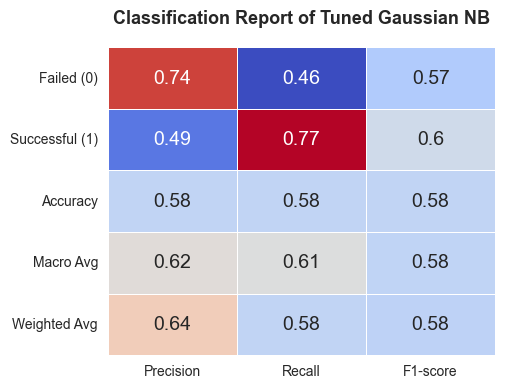

{'model_name': 'Gaussian NB', 'best_score': 0.653463028283902, 'best_params': {'Gaussian NB__var_smoothing': 1e-05}, 'classification_report': {'0': {'precision': 0.7440307982143588, 'recall': 0.45904083282797653, 'f1-score': 0.5677808510305815, 'support': 39576.0}, '1': {'precision': 0.48926475499785294, 'recall': 0.7664337232333047, 'f1-score': 0.5972596356858919, 'support': 26759.0}, 'accuracy': 0.5830406271199217, 'macro avg': {'precision': 0.6166477766061058, 'recall': 0.6127372780306406, 'f1-score': 0.5825202433582367, 'support': 66335.0}, 'weighted avg': {'precision': 0.6412602464629383, 'recall': 0.5830406271199217, 'f1-score': 0.5796723532329099, 'support': 66335.0}}, 'confusion_matrix': array([[18167, 21409],
       [ 6250, 20509]]), 'auc_score': 0.6551086831335585, 'accuracy': 0.5830406271199217, 'f1': 0.5796723532329099, 'precision': 0.6412602464629383, 'recall': 0.5830406271199217}


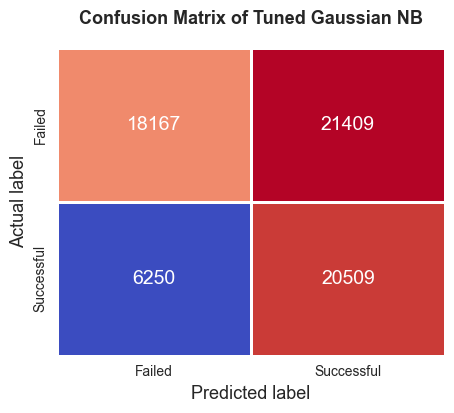

In [131]:
param_grid_gnb = [
    {
        "Gaussian NB__var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
    }
]

results_gnb = perform_grid(gaussianClf, param_grid_gnb, X, y, cv=cv)

print(results_gnb)

In [132]:
gausian_best = results_gnb["best_params"]
gaussian_auc = auc_list[0]
gaussian_acc = accuracy_list[0]
gaussian_f1 = f1_list[0]
gaussian_precision = precision_list[0]
gaussian_recall = recall_list[0]
print('Gaussian NB metrics: ')
print('Gaussian NB Best Params', gausian_best)
print('Gaussian NB AUC: ', gaussian_auc)
print('Gaussian NB Accuracy: ', gaussian_acc)
print('Gaussian NB F1: ', gaussian_f1)
print('Gaussian NB Precision: ', gaussian_precision)
print('Gaussian NB Recall: ', gaussian_recall)

Gaussian NB metrics: 
Gaussian NB Best Params {'Gaussian NB__var_smoothing': 1e-05}
Gaussian NB AUC:  0.6551086831335585
Gaussian NB Accuracy:  0.5830406271199217
Gaussian NB F1:  0.5796723532329099
Gaussian NB Precision:  0.6412602464629383
Gaussian NB Recall:  0.5830406271199217


#### Tuned Bernoulli NB


Best Grid Search result: 0.6323179857597517
Best parameters: {'Bernoulli Naive Bayes__alpha': 1.0, 'Bernoulli Naive Bayes__fit_prior': True}

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.62      0.65     39576
           1       0.50      0.57      0.53     26759

    accuracy                           0.60     66335
   macro avg       0.59      0.59      0.59     66335
weighted avg       0.61      0.60      0.60     66335

Confusion Matrix: 
 [[24406 15170]
 [11531 15228]]

ROC AUC Score: 0.6357480444284588


<Figure size 800x550 with 0 Axes>

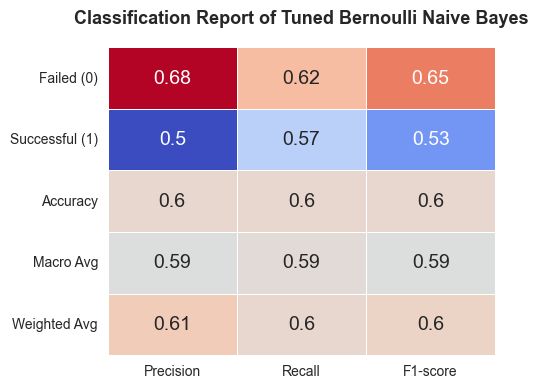

{'model_name': 'Bernoulli Naive Bayes', 'best_score': 0.6323179857597517, 'best_params': {'Bernoulli Naive Bayes__alpha': 1.0, 'Bernoulli Naive Bayes__fit_prior': True}, 'classification_report': {'0': {'precision': 0.6791329270668114, 'recall': 0.6166868809379422, 'f1-score': 0.6464052547243521, 'support': 39576.0}, '1': {'precision': 0.5009540101322455, 'recall': 0.5690795620165178, 'f1-score': 0.5328481200902777, 'support': 26759.0}, 'accuracy': 0.5974824753146906, 'macro avg': {'precision': 0.5900434685995284, 'recall': 0.5928832214772299, 'f1-score': 0.5896266874073148, 'support': 66335.0}, 'weighted avg': {'precision': 0.6072569997546526, 'recall': 0.5974824753146906, 'f1-score': 0.6005972293128318, 'support': 66335.0}}, 'confusion_matrix': array([[24406, 15170],
       [11531, 15228]]), 'auc_score': 0.6357480444284588, 'accuracy': 0.5974824753146906, 'f1': 0.6005972293128318, 'precision': 0.6072569997546526, 'recall': 0.5974824753146906}


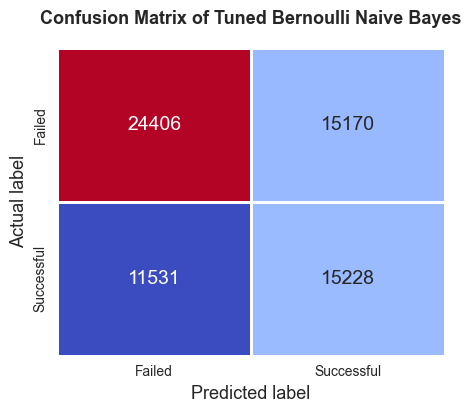

In [133]:
param_grid_ber = [
    {
        "Bernoulli Naive Bayes__alpha": [0.1, 0.5, 1.0, 1.5],
        "Bernoulli Naive Bayes__fit_prior": [True, False],
    }
]

results_ber = perform_grid(berClf, param_grid_ber, X, y, cv= cv)

print(results_ber)

In [134]:
ber_best = results_ber["best_params"]
ber_auc = auc_list[1]
ber_acc = accuracy_list[1]
ber_f1 = f1_list[1]
ber_precision = precision_list[1]
ber_recall = recall_list[0]
print('Bernoulli NB metrics: ')
print('Bernoulli NB Best Params',ber_best)
print('Bernoulli NB AUC: ', ber_auc)
print('Bernoulli NB Accuracy: ', ber_acc)
print('Bernoulli NB F1: ', ber_f1)
print('Bernoulli NB Precision: ', ber_precision)
print('Bernoulli NB Recall: ', ber_recall)

Bernoulli NB metrics: 
Bernoulli NB Best Params {'Bernoulli Naive Bayes__alpha': 1.0, 'Bernoulli Naive Bayes__fit_prior': True}
Bernoulli NB AUC:  0.6551086831335585
Bernoulli NB Accuracy:  0.5830406271199217
Bernoulli NB F1:  0.5796723532329099
Bernoulli NB Precision:  0.6412602464629383
Bernoulli NB Recall:  0.5830406271199217


#### Tuned KNN


Best Grid Search result: 0.6543185763557131
Best parameters: {'knn__n_neighbors': 5, 'knn__p': 1}

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.66      0.67     39576
           1       0.53      0.57      0.55     26759

    accuracy                           0.62     66335
   macro avg       0.61      0.61      0.61     66335
weighted avg       0.63      0.62      0.62     66335

Confusion Matrix: 
 [[25983 13593]
 [11548 15211]]

ROC AUC Score: 0.6543432519313641


<Figure size 800x550 with 0 Axes>

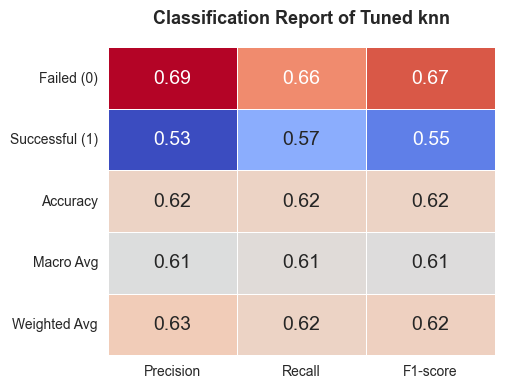

{'model_name': 'knn', 'best_score': 0.6543185763557131, 'best_params': {'knn__n_neighbors': 5, 'knn__p': 1}, 'classification_report': {'0': {'precision': 0.6923076923076923, 'recall': 0.656534263189812, 'f1-score': 0.6739465936944765, 'support': 39576.0}, '1': {'precision': 0.5280863768920984, 'recall': 0.5684442617437124, 'f1-score': 0.5475226319673164, 'support': 26759.0}, 'accuracy': 0.6209994723750659, 'macro avg': {'precision': 0.6101970345998953, 'recall': 0.6124892624667622, 'f1-score': 0.6107346128308965, 'support': 66335.0}, 'weighted avg': {'precision': 0.6260621480368567, 'recall': 0.6209994723750659, 'f1-score': 0.622948194782031, 'support': 66335.0}}, 'confusion_matrix': array([[25983, 13593],
       [11548, 15211]]), 'auc_score': 0.6543432519313641, 'accuracy': 0.6209994723750659, 'f1': 0.622948194782031, 'precision': 0.6260621480368567, 'recall': 0.6209994723750659}


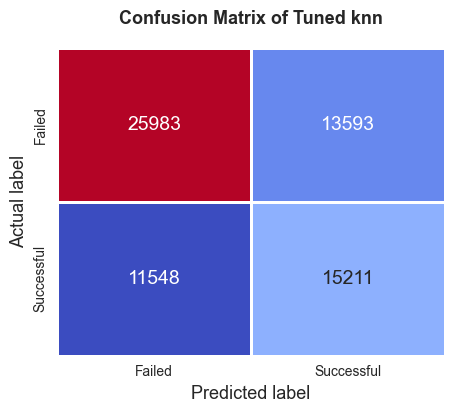

In [135]:
param_grid_knn = [{
 "knn__p": [1, 2],
 "knn__n_neighbors": [3, 4, 5]
 }]

results_knn = perform_grid(knnClf, param_grid_knn, X, y, cv= cv)

print(results_knn)

In [136]:
knn_best = results_knn["best_params"]
knn_auc = auc_list[2]
knn_acc = accuracy_list[2]
knn_f1 = f1_list[2]
knn_precision = precision_list[2]
knn_recall = recall_list[2]
print('KNN metrics: ')
print('KNN Best Params',knn_best)
print('KNN AUC: ', knn_auc)
print('KNN Accuracy: ', knn_acc)
print('KNN F1: ', knn_f1)
print('KNN Precision: ', knn_precision)
print('KNN Recall: ', knn_recall)

KNN metrics: 
KNN Best Params {'knn__n_neighbors': 5, 'knn__p': 1}
KNN AUC:  0.6357480444284588
KNN Accuracy:  0.5974824753146906
KNN F1:  0.6005972293128318
KNN Precision:  0.6072569997546526
KNN Recall:  0.5974824753146906


#### Tuned Logistic Regression


Best Grid Search result: 0.6784775985229474
Best parameters: {'Logistic Regression__C': 0.001, 'Logistic Regression__penalty': 'l1'}

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.62      0.67     39576
           1       0.53      0.64      0.58     26759

    accuracy                           0.63     66335
   macro avg       0.62      0.63      0.62     66335
weighted avg       0.64      0.63      0.63     66335

Confusion Matrix: 
 [[24657 14919]
 [ 9761 16998]]

ROC AUC Score: 0.6790265582505173


<Figure size 800x550 with 0 Axes>

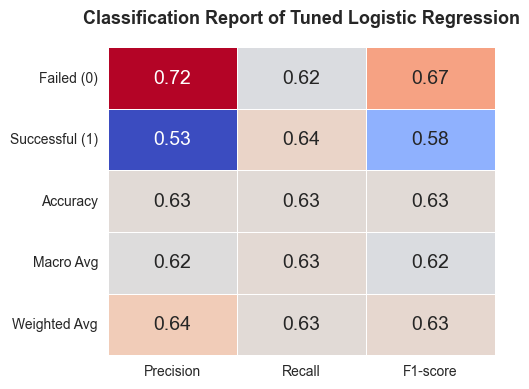

{'model_name': 'Logistic Regression', 'best_score': 0.6784775985229474, 'best_params': {'Logistic Regression__C': 0.001, 'Logistic Regression__penalty': 'l1'}, 'classification_report': {'0': {'precision': 0.7163983961880411, 'recall': 0.6230291085506368, 'f1-score': 0.6664594426575128, 'support': 39576.0}, '1': {'precision': 0.5325688504558699, 'recall': 0.6352255315968459, 'f1-score': 0.579385097825346, 'support': 26759.0}, 'accuracy': 0.6279490465063692, 'macro avg': {'precision': 0.6244836233219555, 'recall': 0.6291273200737413, 'f1-score': 0.6229222702414294, 'support': 66335.0}, 'weighted avg': {'precision': 0.6422430511326831, 'recall': 0.6279490465063692, 'f1-score': 0.6313343594681866, 'support': 66335.0}}, 'confusion_matrix': array([[24657, 14919],
       [ 9761, 16998]]), 'auc_score': 0.6790265582505173, 'accuracy': 0.6279490465063692, 'f1': 0.6313343594681866, 'precision': 0.6422430511326831, 'recall': 0.6279490465063692}


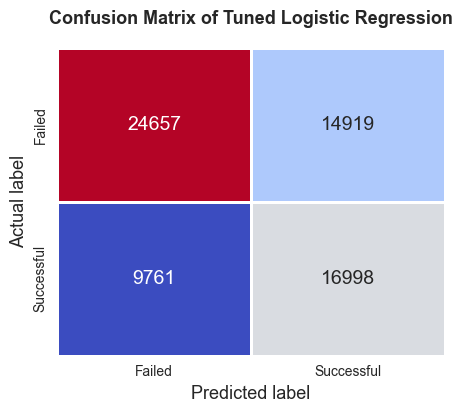

In [137]:
param_grid_log = [{
'Logistic Regression__penalty': ['l1', 'l2'],
'Logistic Regression__C': [0.001, 0.01, 0.1, 1],
 }]

results_log = perform_grid(logClf, param_grid_log, X, y, cv= cv)

print(results_log)

In [138]:
log_best = results_log["best_params"]
log_auc = auc_list[3]
log_acc = accuracy_list[3]
log_f1 = f1_list[3]
log_precision = precision_list[3]
log_recall = recall_list[3]
print('Logistic Regression metrics: ')
print('Logistic Regression Best Params',log_best)
print('Logistic Regression AUC: ', log_auc)
print('Logistic Regression Accuracy: ', log_acc)
print('Logistic Regression F1: ', log_f1)
print('Logistic Regression Precision: ', log_precision)
print('Logistic Regression Recall: ', log_recall)

Logistic Regression metrics: 
Logistic Regression Best Params {'Logistic Regression__C': 0.001, 'Logistic Regression__penalty': 'l1'}
Logistic Regression AUC:  0.6543432519313641
Logistic Regression Accuracy:  0.6209994723750659
Logistic Regression F1:  0.622948194782031
Logistic Regression Precision:  0.6260621480368567
Logistic Regression Recall:  0.6209994723750659


#### Tuned Random Forest


Best Grid Search result: 0.7023956487790306
Best parameters: {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.64      0.68     39576
           1       0.55      0.65      0.60     26759

    accuracy                           0.64     66335
   macro avg       0.64      0.65      0.64     66335
weighted avg       0.66      0.64      0.65     66335

Confusion Matrix: 
 [[25303 14273]
 [ 9296 17463]]

ROC AUC Score: 0.7050884910527317


<Figure size 800x550 with 0 Axes>

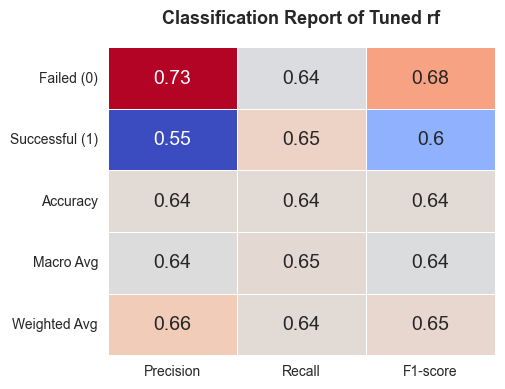

{'model_name': 'rf', 'best_score': 0.7023956487790306, 'best_params': {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}, 'classification_report': {'0': {'precision': 0.731321714500419, 'recall': 0.6393521326056195, 'f1-score': 0.6822514324233232, 'support': 39576.0}, '1': {'precision': 0.550258381648601, 'recall': 0.652602862588288, 'f1-score': 0.5970766732199333, 'support': 26759.0}, 'accuracy': 0.6446973694128288, 'macro avg': {'precision': 0.64079004807451, 'recall': 0.6459774975969538, 'f1-score': 0.6396640528216282, 'support': 66335.0}, 'weighted avg': {'precision': 0.6582822372443431, 'recall': 0.6446973694128288, 'f1-score': 0.647892626641707, 'support': 66335.0}}, 'confusion_matrix': array([[25303, 14273],
       [ 9296, 17463]]), 'auc_score': 0.7050884910527317, 'accuracy': 0.6446973694128288, 'f1': 0.647892626641707, 'precision': 0.6582822372443431, 'recall': 0.6446973694128288}


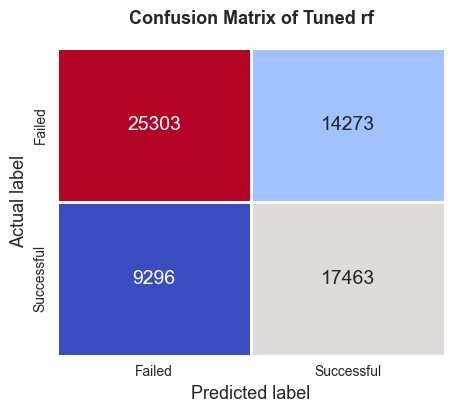

In [139]:
param_grid_rf = [{"rf__max_depth": [3, 4, 5], "rf__min_samples_leaf": [4, 5]}]

results_rf = perform_grid(rfClf, param_grid_rf, X, y, cv= cv)

print(results_rf)

In [140]:
rf_best = results_rf["best_params"]
rf_auc = auc_list[4]
rf_acc = accuracy_list[4]
rf_f1 = f1_list[4]
rf_precision = precision_list[4]
rf_recall = recall_list[4]
print('RF metrics: ')
print('RF Best Params',rf_best)
print('RF AUC: ', rf_auc)
print('RF Accuracy: ', rf_acc)
print('RF F1: ', rf_f1)
print('RF Precision: ', rf_precision)
print('RF Recall: ', rf_recall)

RF metrics: 
RF Best Params {'rf__max_depth': 5, 'rf__min_samples_leaf': 4}
RF AUC:  0.6790265582505173
RF Accuracy:  0.6279490465063692
RF F1:  0.6313343594681866
RF Precision:  0.6422430511326831
RF Recall:  0.6279490465063692


In [143]:
# pd.set_option('display.max_colwidth', None)

#### Best Parameters for Tuned Models


In [144]:
param_compare = pd.DataFrame({"Model": ['Tuned Gaussian NB','Tuned Bernoulli NB','Tuned KNN','Tuned LR','Tuned RF'],
                            
                            "Best Parameters": [gausian_best, ber_best, knn_best, log_best, rf_best],
                        
                        })
param_compare

,Model,Best Parameters
0,Tuned Gaussian NB,{'Gaussian NB__var_smoothing': 1e-05}
1,Tuned Bernoulli NB,"{'Bernoulli Naive Bayes__alpha': 1.0, 'Bernoulli Naive Bayes__fit_prior': True}"
2,Tuned KNN,"{'knn__n_neighbors': 5, 'knn__p': 1}"
3,Tuned LR,"{'Logistic Regression__C': 0.001, 'Logistic Regression__penalty': 'l1'}"
4,Tuned RF,"{'rf__max_depth': 5, 'rf__min_samples_leaf': 4}"


In [145]:
dfi.export(param_compare, "param_compare.png", fontsize= 18, dpi=400)

#### Compared Tuned Models and Baseline Model


In [141]:
compare_all = pd.DataFrame({"Model": ['Dummy Classifier','Tuned Gaussian NB','Tuned Bernoulli NB','Tuned KNN','Tuned LR','Tuned RF'],
                            
                            "Accuracy": [dummyAcc, gaussian_acc, ber_acc, knn_acc, log_acc, rf_acc],
                        
                        "F1_Score": [dummyF1, gaussian_f1, ber_f1, knn_f1, log_f1, rf_f1],
                                                 
                        "Recall": [dummyRec, gaussian_recall, ber_recall, knn_recall, log_recall, rf_recall],
                        
                        "Precision": [dummyPre, gaussian_precision, ber_precision, knn_precision, log_precision, rf_precision],

                        "ROC_AUC": [dummyAUC, gaussian_auc, ber_auc, knn_auc, log_auc, rf_auc]
                        })
compare_all

,Model,Accuracy,F1_Score,Recall,Precision,ROC_AUC
0,Dummy Classifier,0.596608,0.445872,0.596608,0.355941,0.500000
1,Tuned Gaussian NB,0.583041,0.579672,0.583041,0.641260,0.655109
2,Tuned Bernoulli NB,0.583041,0.579672,0.583041,0.641260,0.655109
3,Tuned KNN,0.597482,0.600597,0.597482,0.607257,0.635748
4,Tuned LR,0.620999,0.622948,0.620999,0.626062,0.654343
5,Tuned RF,0.627949,0.631334,0.627949,0.642243,0.679027


In [142]:
# dfi.export(compare_all, "compare_all.png", fontsize= 18, dpi=400)